In [1]:
# Paul-Jason Mello
# Professor Shim
# CMPE 257
# March 19th, 2022

# Decision Trees and Random Forests

## 1. What is a decision tree?

In [2]:
# At its core a decision tree is a categorical machine learning model. It aims to find the best split, as
# determined by purity, in order to find a model which can seperate the target variables the most effectively. 
# A decision tree splits each feature into its categorical variables at different depths. Meaning that each 
# layer down is another feature which has more categories to split. In the leaf nodes we find the purity and 
# split which gives us our accuracy. It is a conceptually simple model to understand.

## 2. What are the advantages and disadvantages of a decision tree?

In [3]:
# The advantages of a decision tree are that it can be used for regression and categorical problems. 
# It is also incredibly easy to understand with the added benefit that scaling does not need to be done.

# The disadvantages of a decision tree consist of the necessity to determine the proper order in which 
# the feature layers are used. This order can greatly impact a models training time. It also fails to properly
# predict continuous variables. Small changes in the data or structure of the tree can have adverse negative
# consequences on the training and run time of the model.

## 3. Explain pruning

In [4]:
# Pruning, just like in gardening, is a way to "clean up" the tree. There are many ways to incorporate pruning
# including the ability to cut specific branches of our tree. Pruning allows us to minimize the number of 
# branches such that our answers are, on average, quicker to obtain. However, pruning may also return more 
# accurate results as it can remove what we would consider to be a "dead branch", one with little to no value
# to the tree. Overall, pruning is a very important tool of machine learning that can provide a breadth of 
# positive results. The only negative consequence of pruning is that it may fail when there is an excessive 
# amount of sparsity.

## 4. What is ensembling?

In [5]:
# In its simpilest form, an ensemble algorithm is a committee of algorithms which vote on an answer. Some
# arbitrary number of algorithms present their predicted answers when given the same input. Through a 
# committee process the answer with the most votes is considered to be the unanimous answer of ensembling. 
# It is at its core, a democratic process. Ensemble algorithms can give better results at the cost of an 
# increase in needed computational power.

## 5. Explain bagging

In [6]:
# Bagging, aka Bootstrap aggregating, is an ensemble technique which prevents the overfitting of data, and
# improves overall accuracy. It does so through random sampling with replacement. In this regard we are 
# sampling from our data at random which gives us another layer of protection against overfitting our models.

## 6. What are random forests?

In [7]:
# Random forests are a machine learning technique which follows similar principles of a decision tree, but
# provides far better results. In its simpilest form we create N decision trees and through an ensemble
# technique find the tree with the best accuracies. It is a merger of decision trees and an ensemble process.

## 7. Classify the iris dataset using decision trees

In [8]:
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

In [9]:
data = load_iris()

In [10]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [11]:
temp = data.target

In [12]:
data = pd.DataFrame(data = data.data, columns = data.feature_names)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [14]:
data['target'] = temp

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data, data.target, test_size = 0.25, random_state = 0)

In [16]:
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)

In [17]:
y_pred = model.predict(X_test)
y_t_pred = model.predict(X_train)

In [18]:
# I believe we get perfect accuracy as a result of the cleanliness of iris dataset.

print("DT Base Matrix: \n" + str(confusion_matrix(y_train, y_t_pred)))
print("\n")
print("DT Base Accuracy: " + str(accuracy_score(y_test, y_pred)))

DT Base Matrix: 
[[37  0  0]
 [ 0 34  0]
 [ 0  0 41]]


DT Base Accuracy: 1.0


## 8. Tune the hyper parameters and comment the meaning of each hyper parameter you have tuned

In [19]:
# The hyper parameters I have tested using grid search are the following:
# 
# Criterion: We can choose between entropy and gini which are both different ways to calculate purity / 
#     information gain. Gini is easier to calculate and goes from 0 - .5, while entropy is more difficult to
#     calculate and goes from 0 - 1. This can help determine which split provides the best accuracy coverage.
# Max Depth: Max depth essentially finds the maximum depth the decision tree can go for its assessment.
# Min Sample Split: The minimum number of samples needed in order to split the tree's branch.
# Min Sample Leaf: The minimum number of samples needed for a leaf node.

params = {"criterion": ["entropy", "gini"], 
          "max_depth": range(1, 10), 
          "min_samples_split": range(2, 10), 
          "min_samples_leaf": range(1, 5)}

In [20]:
search = GridSearchCV(model, param_grid = params, cv = 10, verbose = 1, n_jobs = -1)
search.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [21]:
# Here we get the best combination of parameters using gridsearch

search.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [22]:
bestDT = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, 
                                     min_samples_leaf = 1, min_samples_split = 2)
bestDT = bestDT.fit(X_train, y_train)

In [23]:
y_pred = bestDT.predict(X_test)
y_t_pred = bestDT.predict(X_train)

In [24]:
print("DT Tuned Matrix: \n" + str(confusion_matrix(y_train, y_t_pred)))
print("\n")
print("DT Tuned Accuracy: " + str(accuracy_score(y_test, y_pred)))

DT Tuned Matrix: 
[[37  0  0]
 [ 0 34  0]
 [ 0  0 41]]


DT Tuned Accuracy: 1.0


## 9. Plot the tree and feature importances

[Text(0.6, 0.8333333333333334, 'X[4] <= 1.5\nentropy = 1.581\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(0.4, 0.5, 'X[4] <= 0.5\nentropy = 0.999\nsamples = 71\nvalue = [37, 34, 0]'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 41\nvalue = [0, 0, 41]')]

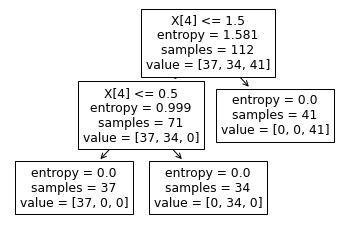

In [25]:
tree.plot_tree(bestDT)

<AxesSubplot:>

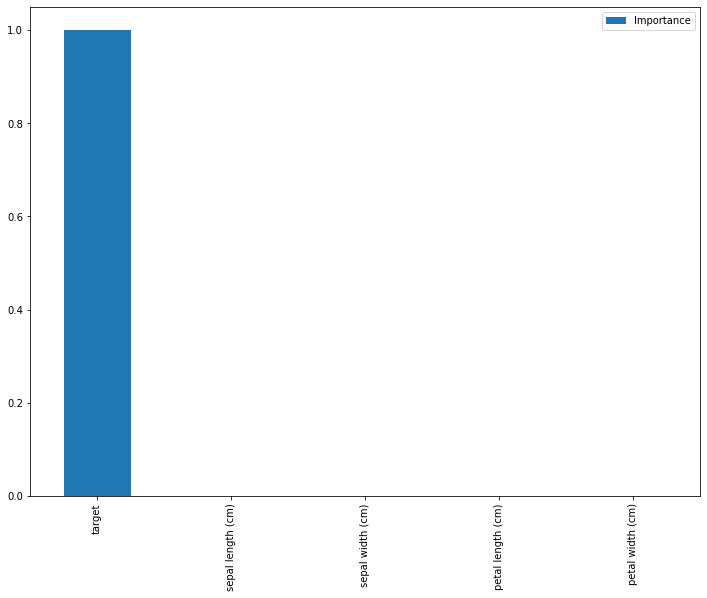

In [26]:
features = pd.DataFrame(bestDT.feature_importances_, index = X_train.columns, columns = ["Importance"])
features.sort_values(by='Importance', ascending = False, inplace = True)
features.plot(kind = 'bar', figsize = (12,9))

## 10. Repeat questions 7 and 8 using random forests

In [27]:
RFmodel = RandomForestClassifier()
RFmodel = RFmodel.fit(X_train, y_train)

y_pred = RFmodel.predict(X_test)
y_t_pred = RFmodel.predict(X_train)

In [28]:
print("RF Base Matrix: \n" + str(confusion_matrix(y_train, y_t_pred)))
print("\n")
print("RF Base Accuracy: " + str(accuracy_score(y_test, y_pred)))

RF Base Matrix: 
[[37  0  0]
 [ 0 34  0]
 [ 0  0 41]]


RF Base Accuracy: 1.0


In [29]:
# The hyper parameters I have tested using random search are the following:
# 
# n_estimators: The number of esimators to be tested and used for our models decision process/
# max_features: Number of features selected at random by model.
# max_depth: The maximum depth our tree should be campable of going before having to make a deicision.
# min_samples_split: The minimum number of samples needed in order to split the tree's branch.
# min_samples_leaf: The minimum number of samples needed for a leaf node.

rGrid = {'n_estimators': range(1, 200),
         'max_features': ["auto", "sqrt"],
         "max_depth": range(1, 10), 
         "min_samples_split": range(2, 10), 
         "min_samples_leaf": range(1, 5)}

In [30]:
newModel = RandomizedSearchCV(estimator = RFmodel, 
                               param_distributions = rGrid, 
                               n_iter = 100, 
                               cv = 5, 
                               verbose = 1, 
                               random_state = 0, 
                               n_jobs = -1)

In [31]:
newModel = newModel.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [32]:
# These parameters change every time it is run. As a result our model will only use on of these runs.

newModel.best_params_

{'n_estimators': 12,
 'min_samples_split': 9,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 6}

In [33]:
bestRF = RandomForestClassifier(n_estimators = 147, 
                                min_samples_split = 4,
                                min_samples_leaf = 2,
                                max_features = "auto",
                                max_depth = 7)
bestRF = bestRF.fit(X_train, y_train)

In [34]:
y_pred = bestRF.predict(X_test)
y_t_pred = bestRF.predict(X_train)

In [35]:
print("RF Tuned Matrix: \n" + str(confusion_matrix(y_train, y_t_pred)))
print("\n")
print("RF Tuned Accuracy: " + str(accuracy_score(y_test, y_pred)))

RF Tuned Matrix: 
[[37  0  0]
 [ 0 34  0]
 [ 0  0 41]]


RF Tuned Accuracy: 1.0


## 11. pick top features from random forest again and try to create a model using only those.

<AxesSubplot:>

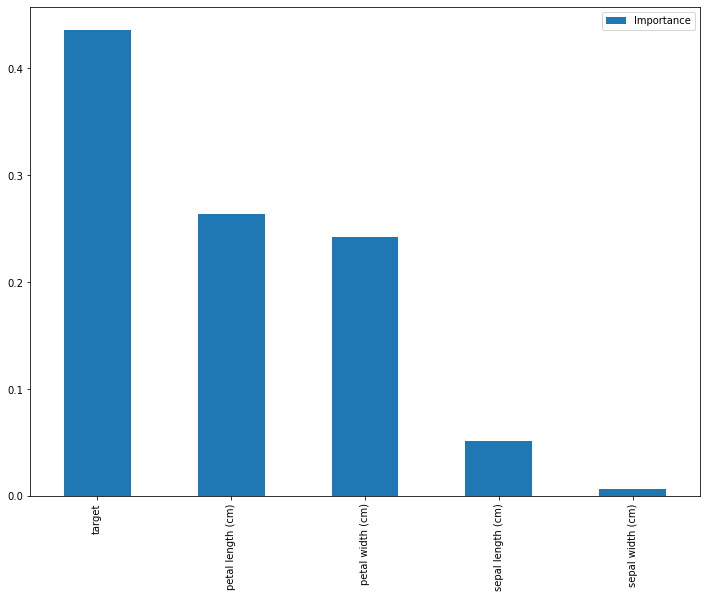

In [36]:
features = pd.DataFrame(bestRF.feature_importances_, index = X_train.columns, columns = ["Importance"])
features.sort_values(by = 'Importance', ascending = False, inplace = True)
features.plot(kind = 'bar', figsize = (12,9))

In [37]:
newData = data.drop(["sepal length (cm)", "sepal width (cm)"], axis = 1, inplace = True)
newData

In [38]:
# Reusing the best random classifier we found earlier

RFTest = RandomForestClassifier(n_estimators = 147, 
                                min_samples_split = 4,
                                min_samples_leaf = 2,
                                max_features = "auto",
                                max_depth = 7)

RFTest = RFTest.fit(X_train, y_train)

In [39]:
y_pred = RFTest.predict(X_test)
y_t_pred = RFTest.predict(X_train)

In [40]:
print("RF Top Feature Matrix: \n" + str(confusion_matrix(y_train, y_t_pred)))
print("\n")
print("RF Top Feature Accuracy: " + str(accuracy_score(y_test, y_pred)))

RF Top Feature Matrix: 
[[37  0  0]
 [ 0 34  0]
 [ 0  0 41]]


RF Top Feature Accuracy: 1.0
